In [1]:
import pandas as pd

data1 = pd.read_csv(r'data\dataset1.csv', error_bad_lines=False,sep=';')
data2 = pd.read_csv(r'data\dataset2.csv', error_bad_lines=False,sep=';')
data3 = pd.read_csv(r'data\dataset3.csv', error_bad_lines=False,sep=';')
data4 = pd.read_csv(r'data\dataset4.csv', error_bad_lines=False,sep=';')
frames = [data1,data2,data3,data4]
us_election = pd.concat(frames,ignore_index=True)

In [2]:
us_election.head()

,ACFS,Adult.obesity,Adult.smoking,Adults.65.and.Older.Living.in.Poverty,African.American.Population,Amerindian,Asian,Asian.American.Population,At.Least.Bachelor.s.Degree,At.Least.High.School.Diploma,...,summer_TAVG,summer_TMAX,summer_TMIN,temp,temp_bins,votes,winter_PRCP,winter_TAVG,winter_TMAX,winter_TMIN
0,0.000044,0.300,0.183,6.85,23.55,0.55,2.35,2.35,37.4,87.8,...,773.0,885.0,660.0,15.333333,"14.9, 16.6",159473,1607.0,412.0,524.0,300.0
1,0.000024,0.314,0.173,7.95,3.85,4.75,1.45,1.45,17.9,83.7,...,NaN,NaN,NaN,NaN,NaN,77387,NaN,NaN,NaN,NaN
2,0.000115,0.373,0.251,21.30,46.50,0.35,0.25,0.25,13.5,71.9,...,783.0,903.0,663.0,17.333333,"16.6, 18.5",10390,NaN,470.0,601.0,339.0
3,0.000043,0.384,0.231,15.45,31.45,0.25,0.40,0.40,11.9,75.7,...,NaN,NaN,NaN,NaN,NaN,33218,NaN,NaN,NaN,NaN
4,0.000507,0.368,0.362,24.15,53.60,0.10,0.30,0.30,12.6,69.3,...,813.0,918.0,708.0,17.833333,"16.6, 18.5",4176,1662.5,454.0,561.0,347.5


In [3]:
state = set()
for i in range(3113):
    if (type(us_election.ST[i]) is not float):
        state.add(us_election.ST[i])
state_list = list(state)
df3 = pd.DataFrame({'Votes':0,'Total':0},index = state_list)

for i in range(3113):
    if(us_election.ST[i] in state):
        df3.loc[us_election.ST[i],'Votes'] = df3.loc[us_election.ST[i],'Votes'] + us_election['Trump D'][i]
        df3.loc[us_election.ST[i],'Total'] = df3.loc[us_election.ST[i],'Total'] + us_election['votes'][i]
df3

,Total,Votes
CA,8919517,2965704
WA,2035633,768190
NM,788841,315875
NC,4629471,2339603
SC,2084444,1143611
VT,291268,95027
ID,688235,407199
TN,2484691,1517402
MN,2911740,1321120
IL,5374280,2118179


In [4]:
vote_rate_dic = {}
for i in range(50):
    rate = df3.loc[state_list[i],'Votes']/df3.loc[state_list[i],'Total']
    vote_rate_dic.update({state_list[i]:rate})
vote_rate_dic = sorted(vote_rate_dic.items(),key = lambda d:d[1], reverse = True)
result = []
for i in range(5):
    result.append(str(vote_rate_dic[i])[2:4])
for i in range(5):
    result.append(str(vote_rate_dic[i+45])[2:4])
result

['WY', 'WV', 'OK', 'ND', 'AL', 'MA', 'CA', 'VT', 'HI', 'DC']

In [5]:
#df3 = pd.DataFrame({'White not Latino':0,'African American':0,'Native American':0,'Asian American':0,'Latino':0,'Other races':0},index = result)
df3 = pd.DataFrame({'Race':'','Percent':0},index = result)
df3

,Percent,Race
WY,0,
WV,0,
OK,0,
ND,0,
AL,0,
MA,0,
CA,0,
VT,0,
HI,0,
DC,0,


In [6]:
#White not Latino
pres_WNL =[]
#African American
pres_AA = []
#Native American
pres_NA = []
#Asian American
pres_AsA = []
#Latino
pres_L = []
#Others
pres_O = []
for i in range(10):
    WNL= 0
    AA=0
    NA=0
    AsA=0
    L=0
    O=0
    total = 0
    for j in range(3113):
        if us_election.ST[j] == result[i]:
            WNL= WNL + (us_election['White.not.Latino.Population'][j] * us_election['Total.Population'][j])
            AA= AA + (us_election['African.American.Population'][j] * us_election['Total.Population'][j])
            NA = NA + (us_election['Native.American.Population'][j]* us_election['Total.Population'][j])
            AsA = AsA + (us_election['Asian.American.Population'][j]* us_election['Total.Population'][j])
            L = L + (us_election['Latino.Population'][j]* us_election['Total.Population'][j])
            O = O + (us_election['Population.some.other.race.or.races'][j]* us_election['Total.Population'][j])
            total = total + us_election['Total.Population'][j]
    pres_WNL.append(WNL/total)
    pres_AA.append(AA/total)
    pres_NA.append(NA/total)
    pres_AsA.append(AsA/total)
    pres_L.append(L/total)
    pres_O.append(O/total)


In [7]:
print(pres_WNL)

[86.361953290577659, 93.317518530333956, 70.094881791892433, 89.257968012277544, 67.780358343312329, 77.527054324649157, 41.34860710656001, 94.723865690865111, 23.780229259188282, 33.350000000000001]


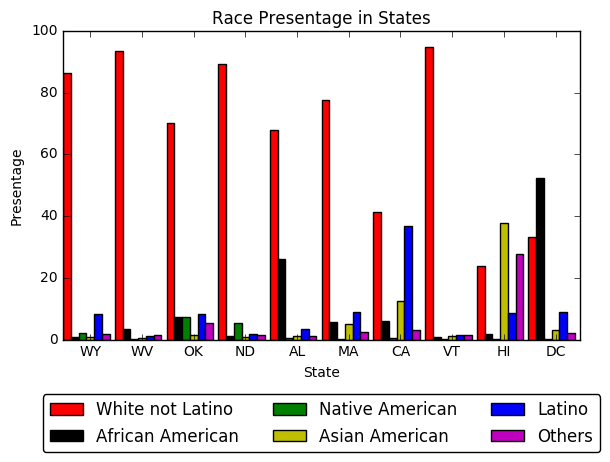

In [8]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
n = len(pres_O)
index = np.arange(n)
bar_width = 0.15
rects1 = plt.bar(index, pres_WNL, bar_width,
                 color='r',
                 label='White not Latino')
rects2 = plt.bar(index + bar_width, pres_AA, bar_width,
                 color='k',
                 label='African American')
rects3 = plt.bar(index + bar_width*2, pres_NA, bar_width,
                 color='g',
                 label='Native American')
rects4 = plt.bar(index + bar_width*3, pres_AsA, bar_width,
                 color='y',
                 label='Asian American')
rects5 = plt.bar(index + bar_width*4, pres_L, bar_width,
                 color='b',
                 label='Latino')
rects6 = plt.bar(index + bar_width*5, pres_O, bar_width,
                 color='m',
                 label='Others')

plt.xlabel('State')
plt.ylabel('Presentage')
plt.title('Race Presentage in States')

plt.xticks(index+bar_width*3.5, result)
ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15),
          ncol=3, fancybox=True)
plt.tight_layout()
plt.savefig('Race_Presentage_in_States.png')
plt.show()